In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import os
import seaborn as sns
from collections import Counter
import matplotlib
import platform



def set_chinese_font():
    system = platform.system()
    if system == 'Windows':
        matplotlib.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
    elif system == 'Linux':
        # 优先使用Noto Sans CJK SC，其次WenQuanYi Micro Hei，再次SimHei
        matplotlib.rcParams['font.sans-serif'] = ['Noto Sans CJK SC', 'WenQuanYi Micro Hei', 'SimHei']
    else:
        # 其他系统可根据需要添加
        matplotlib.rcParams['font.sans-serif'] = ['SimHei']
    matplotlib.rcParams['axes.unicode_minus'] = False  # 正常显示负号

set_chinese_font()

In [10]:
import pandas as pd

# 读取merged_events_timeseries.csv文件
filtered_df = pd.read_csv('./script/merged_all_events.csv')



准备聚类分析...
使用肘部法确定最佳聚类数...


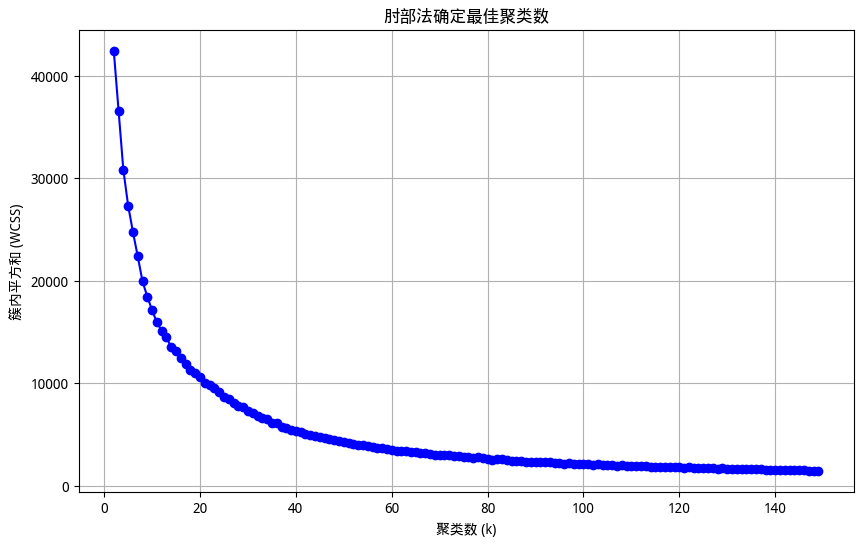

选择聚类数: 100

聚类分析结果:

聚类 0 (共 1026 个事件):
平均速度:
  XBJ4_speed: 92.41
  XBJ1_speed: 94.92
  折叠机_speed: 135.55
  裁切机_speed: 114.25
  XBJ3_speed: 94.53
  XBJ2_speed: 94.08
  存纸率: 0.63

聚类 1 (共 67 个事件):
平均速度:
  XBJ4_speed: 0.25
  XBJ1_speed: 94.94
  折叠机_speed: 135.04
  裁切机_speed: 114.40
  XBJ3_speed: 94.79
  XBJ2_speed: 94.07
  存纸率: 25.84

聚类 2 (共 124 个事件):
平均速度:
  XBJ4_speed: 7.34
  XBJ1_speed: 95.01
  折叠机_speed: 9.35
  裁切机_speed: 114.37
  XBJ3_speed: 6.40
  XBJ2_speed: 4.52
  存纸率: 1.32

聚类 3 (共 29 个事件):
平均速度:
  XBJ4_speed: 9.62
  XBJ1_speed: 95.00
  折叠机_speed: 136.93
  裁切机_speed: 12.79
  XBJ3_speed: 95.00
  XBJ2_speed: 0.86
  存纸率: 2.59

聚类 4 (共 192 个事件):
平均速度:
  XBJ4_speed: 92.57
  XBJ1_speed: 95.04
  折叠机_speed: 133.18
  裁切机_speed: 114.24
  XBJ3_speed: 94.86
  XBJ2_speed: 0.25
  存纸率: 1.51

聚类 5 (共 91 个事件):
平均速度:
  XBJ4_speed: 92.27
  XBJ1_speed: 6.71
  折叠机_speed: 133.81
  裁切机_speed: 114.30
  XBJ3_speed: 95.00
  XBJ2_speed: 94.09
  存纸率: 29.55

聚类 6 (共 219 个事件):
平均速度:
  XBJ4_speed: 92.11
  XB

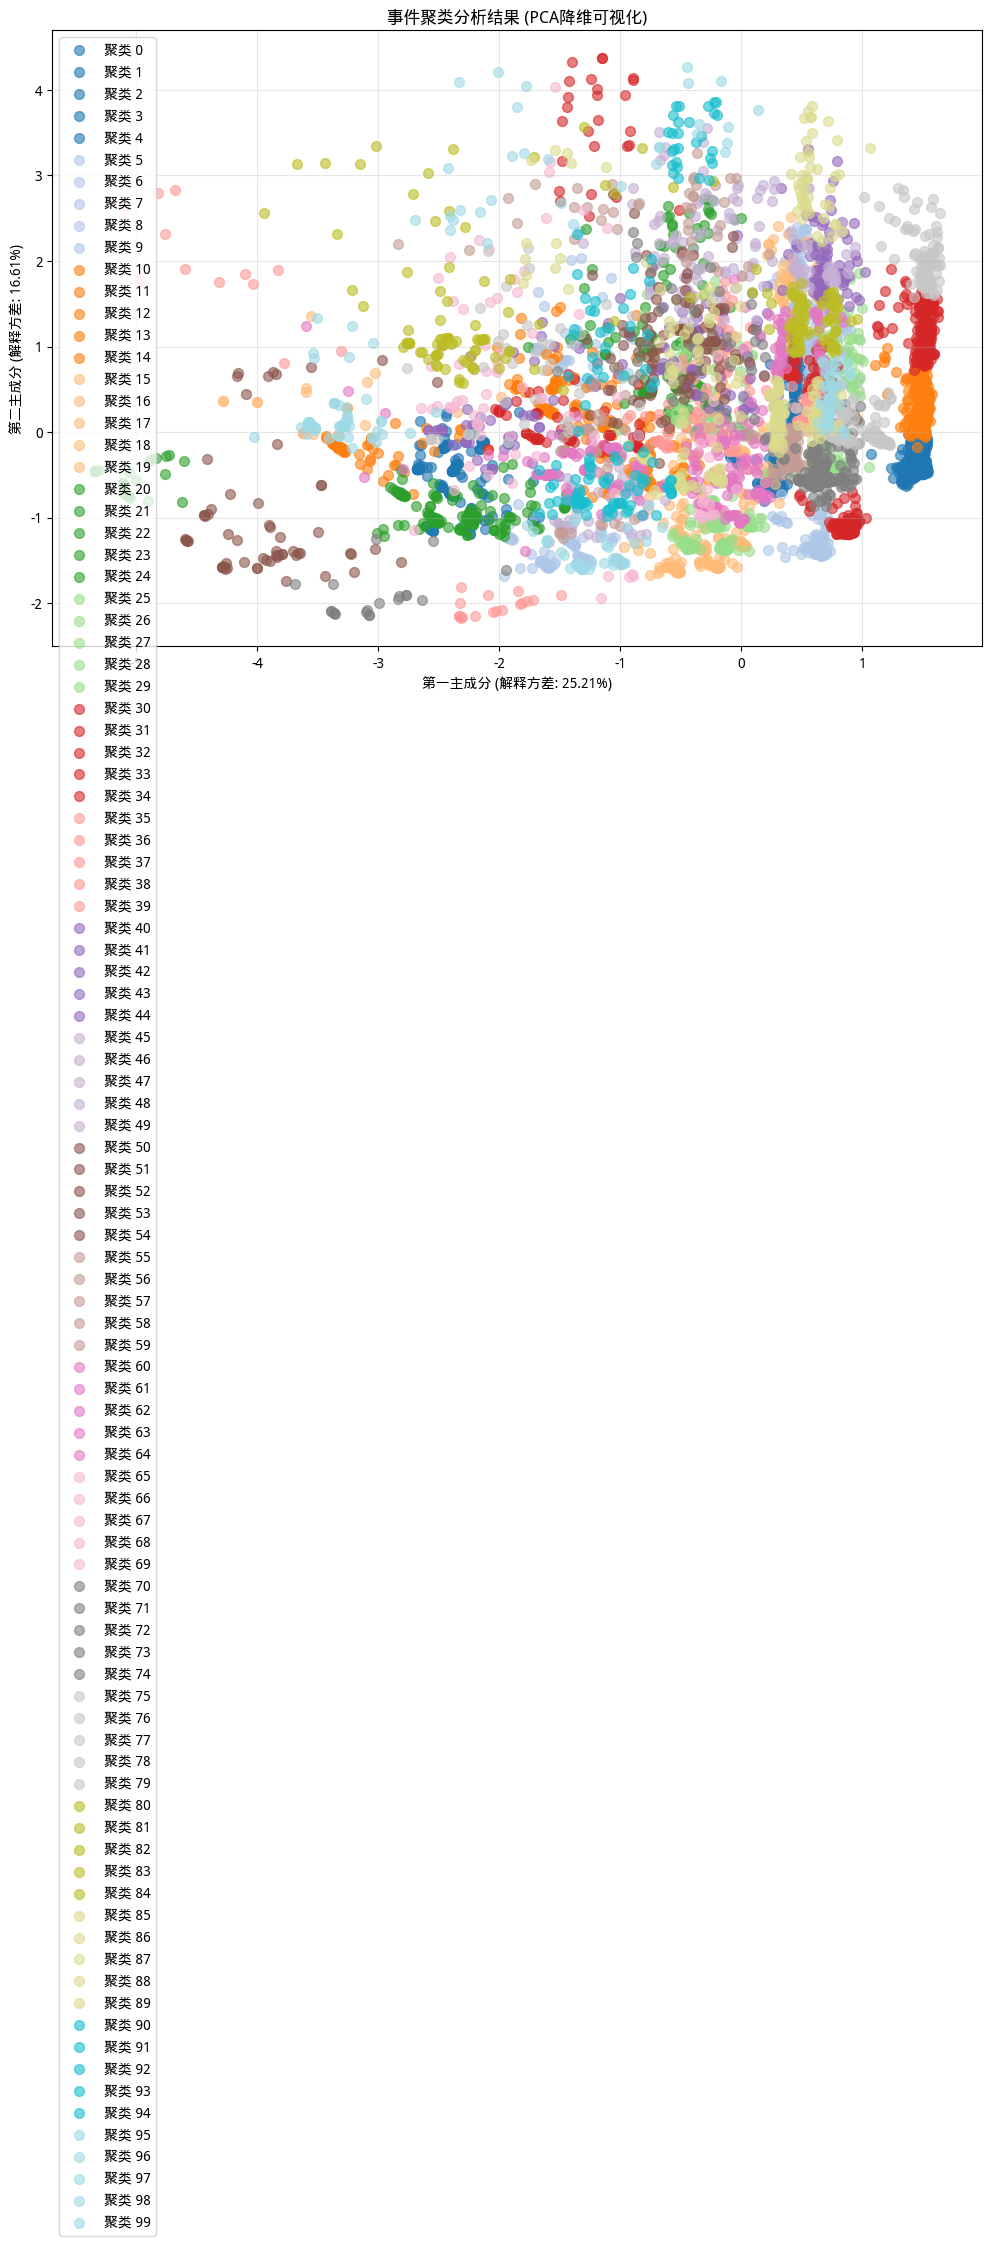

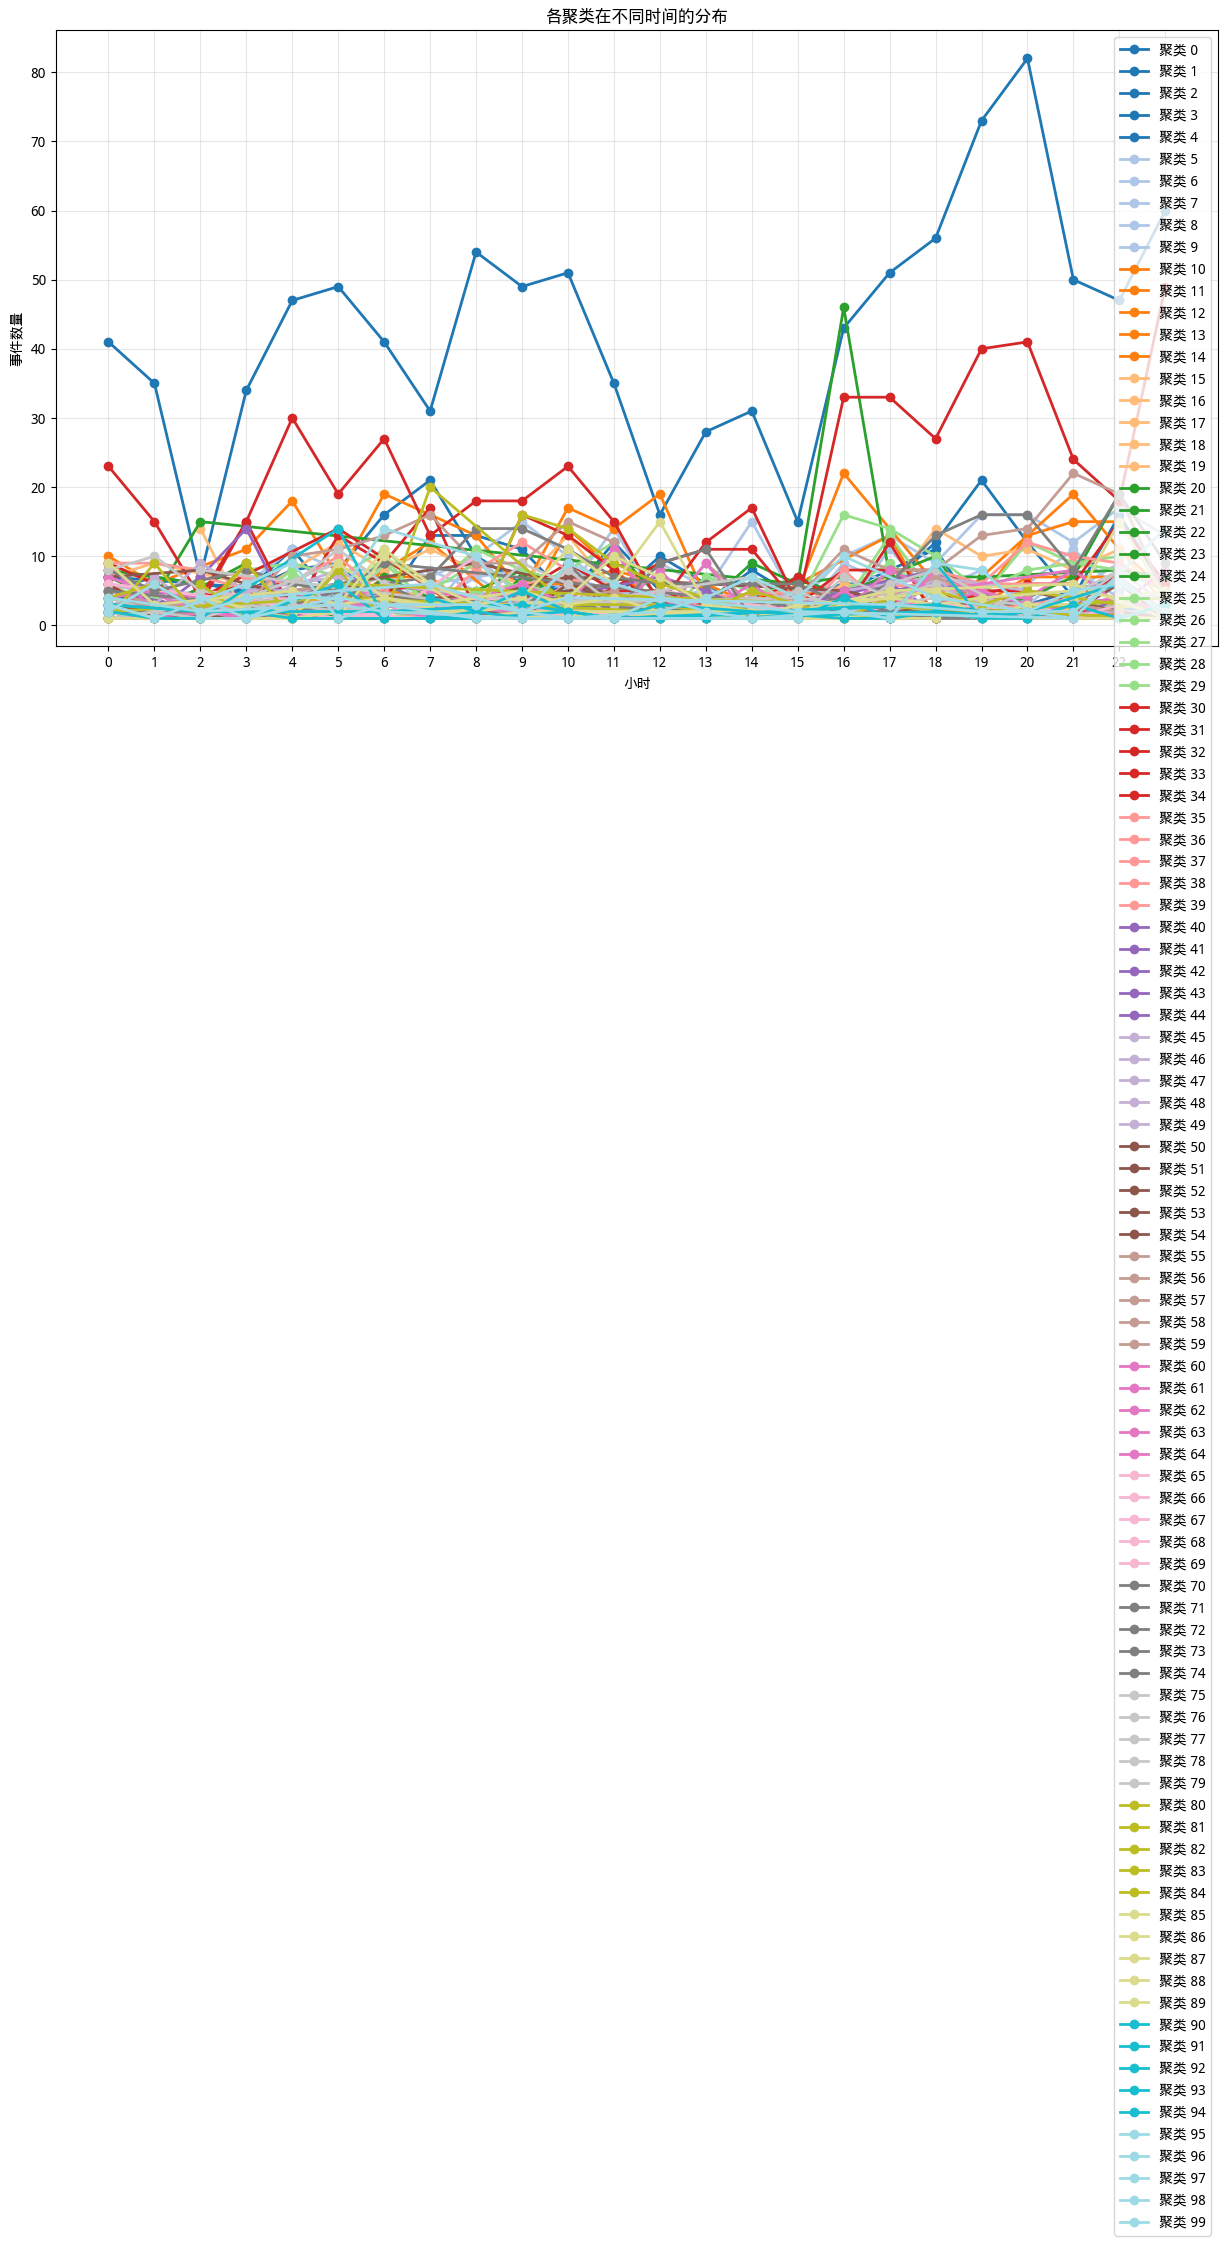


聚类结果已保存到 'output/events_clustered.csv'

聚类统计信息:
聚类 0: 1026 个事件 (13.9%)
聚类 1: 67 个事件 (0.9%)
聚类 2: 124 个事件 (1.7%)
聚类 3: 29 个事件 (0.4%)
聚类 4: 192 个事件 (2.6%)
聚类 5: 91 个事件 (1.2%)
聚类 6: 219 个事件 (3.0%)
聚类 7: 77 个事件 (1.0%)
聚类 8: 52 个事件 (0.7%)
聚类 9: 99 个事件 (1.3%)
聚类 10: 20 个事件 (0.3%)
聚类 11: 55 个事件 (0.7%)
聚类 12: 122 个事件 (1.7%)
聚类 13: 110 个事件 (1.5%)
聚类 14: 222 个事件 (3.0%)
聚类 15: 22 个事件 (0.3%)
聚类 16: 14 个事件 (0.2%)
聚类 17: 159 个事件 (2.2%)
聚类 18: 41 个事件 (0.6%)
聚类 19: 50 个事件 (0.7%)
聚类 20: 32 个事件 (0.4%)
聚类 21: 32 个事件 (0.4%)
聚类 22: 104 个事件 (1.4%)
聚类 23: 142 个事件 (1.9%)
聚类 24: 21 个事件 (0.3%)
聚类 25: 19 个事件 (0.3%)
聚类 26: 148 个事件 (2.0%)
聚类 27: 53 个事件 (0.7%)
聚类 28: 137 个事件 (1.9%)
聚类 29: 75 个事件 (1.0%)
聚类 30: 520 个事件 (7.1%)
聚类 31: 67 个事件 (0.9%)
聚类 32: 107 个事件 (1.5%)
聚类 33: 26 个事件 (0.4%)
聚类 34: 161 个事件 (2.2%)
聚类 35: 13 个事件 (0.2%)
聚类 36: 58 个事件 (0.8%)
聚类 37: 17 个事件 (0.2%)
聚类 38: 145 个事件 (2.0%)
聚类 39: 39 个事件 (0.5%)
聚类 40: 19 个事件 (0.3%)
聚类 41: 10 个事件 (0.1%)
聚类 42: 42 个事件 (0.6%)
聚类 43: 61 个事件 (0.8%)
聚类 44: 73 个事件 (1.0%

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# 准备聚类分析的特征数据
print("准备聚类分析...")

# 提取数值特征用于聚类
feature_columns = ['XBJ4_speed', 'XBJ1_speed', '折叠机_speed', '裁切机_speed', 
                   'XBJ3_speed', 'XBJ2_speed', '存纸率']

# 创建特征矩阵
X = filtered_df[feature_columns].values

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用肘部法确定最佳聚类数
print("使用肘部法确定最佳聚类数...")
inertias = []
K_range = range(2, 150)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 绘制肘部图
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('聚类数 (k)')
plt.ylabel('簇内平方和 (WCSS)')
plt.title('肘部法确定最佳聚类数')
plt.grid(True)
plt.show()

# 选择最佳聚类数（这里选择k=4作为示例）
optimal_k = 100
print(f"选择聚类数: {optimal_k}")

# 执行K-means聚类
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=50)
cluster_labels = kmeans.fit_predict(X_scaled)

# 将聚类结果添加到数据框
filtered_df_clustered = filtered_df.copy()
filtered_df_clustered['cluster'] = cluster_labels

# 分析每个聚类的特征
print("\n聚类分析结果:")
for i in range(optimal_k):
    cluster_data = filtered_df_clustered[filtered_df_clustered['cluster'] == i]
    print(f"\n聚类 {i} (共 {len(cluster_data)} 个事件):")
    print("平均速度:")
    for col in feature_columns:
        mean_val = cluster_data[col].mean()
        print(f"  {col}: {mean_val:.2f}")

# 使用PCA进行降维可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 绘制聚类结果
plt.figure(figsize=(12, 8))
# 生成足够多的颜色，使用colormap来确保有足够的颜色
colors = plt.cm.tab20(np.linspace(0, 1, optimal_k))

for i in range(optimal_k):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                c=[colors[i]], label=f'聚类 {i}', alpha=0.6, s=50)

plt.xlabel(f'第一主成分 (解释方差: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'第二主成分 (解释方差: {pca.explained_variance_ratio_[1]:.2%})')
plt.title('事件聚类分析结果 (PCA降维可视化)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 分析聚类的时间分布
plt.figure(figsize=(15, 8))
filtered_df_clustered['timestamp'] = pd.to_datetime(filtered_df_clustered['timestamp'])
filtered_df_clustered['hour'] = filtered_df_clustered['timestamp'].dt.hour

# 使用colormap为时间分布图生成颜色
time_colors = plt.cm.tab20(np.linspace(0, 1, optimal_k))

for i in range(optimal_k):
    cluster_data = filtered_df_clustered[filtered_df_clustered['cluster'] == i]
    hour_counts = cluster_data['hour'].value_counts().sort_index()
    plt.plot(hour_counts.index, hour_counts.values, 
             marker='o', label=f'聚类 {i}', linewidth=2, color=time_colors[i])

plt.xlabel('小时')
plt.ylabel('事件数量')
plt.title('各聚类在不同时间的分布')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.show()

# 保存聚类结果
filtered_df_clustered.to_csv('output/events_clustered.csv', index=False)
print(f"\n聚类结果已保存到 'output/events_clustered.csv'")

# 显示聚类统计信息
print("\n聚类统计信息:")
cluster_stats = filtered_df_clustered['cluster'].value_counts().sort_index()
for cluster_id, count in cluster_stats.items():
    percentage = (count / len(filtered_df_clustered)) * 100
    print(f"聚类 {cluster_id}: {count} 个事件 ({percentage:.1f}%)")


In [ ]:
# 读取events_only.csv数据并进行设备状态聚类分析
print("=== 设备状态聚类分析 ===")

# 读取events_only.csv文件
events_df = pd.read_csv('script/merged_all_events.csv')
print(f"原始数据形状: {events_df.shape}")

# 排除指定的列
columns_to_exclude = ['paper_storage_rate', 'has_event', 'event_details']
device_columns = [col for col in events_df.columns if col not in columns_to_exclude and col != 'timestamp']
print(f"设备相关列: {device_columns}")

# 提取六台设备的状态列
device_status_columns = ['XBJ1_status', 'XBJ2_status', 'XBJ3_status', 'XBJ4_status', '裁切机_status', '折叠机_status']
device_names = ['XBJ1', 'XBJ2', 'XBJ3', 'XBJ4', '裁切机', '折叠机']

# 创建设备状态组合数据
status_data = events_df[['timestamp'] + device_status_columns].copy()
status_data['timestamp'] = pd.to_datetime(status_data['timestamp'])

# 创建状态组合字符串
status_data['state_combination'] = status_data[device_status_columns].apply(
    lambda row: tuple(row.values), axis=1
)

print(f"\n发现的设备状态组合数量: {status_data['state_combination'].nunique()}")

# 统计各种状态组合的出现频次
state_counts = status_data['state_combination'].value_counts()
print(f"\n前20个最常见的状态组合:")
for i, (state, count) in enumerate(state_counts.head(20).items()):
    percentage = (count / len(status_data)) * 100
    state_str = " | ".join([f"{device}: {status}" for device, status in zip(device_names, state)])
    print(f"{i+1:2d}. {state_str}")
    print(f"    出现次数: {count} ({percentage:.1f}%)")
    print()

# 创建状态转移矩阵
print("=== 状态转移概率分析 ===")

# 获取所有唯一状态
unique_states = list(state_counts.index)
state_to_index = {state: i for i, state in enumerate(unique_states)}
n_states = len(unique_states)

print(f"总共有 {n_states} 种不同的状态组合")

# 初始化转移矩阵
transition_matrix = np.zeros((n_states, n_states))
transition_counts = np.zeros((n_states, n_states))
transition_durations = {}  # 存储状态转移的持续时间

# 计算状态转移和持续时间
for i in range(len(status_data) - 1):
    current_state = status_data.iloc[i]['state_combination']
    next_state = status_data.iloc[i + 1]['state_combination']
    
    current_idx = state_to_index[current_state]
    next_idx = state_to_index[next_state]
    
    transition_counts[current_idx, next_idx] += 1
    
    # 计算时间差（分钟）
    current_time = status_data.iloc[i]['timestamp']
    next_time = status_data.iloc[i + 1]['timestamp']
    duration_minutes = (next_time - current_time).total_seconds() / 60
    
    # 存储转移持续时间
    transition_key = (current_idx, next_idx)
    if transition_key not in transition_durations:
        transition_durations[transition_key] = []
    transition_durations[transition_key].append(duration_minutes)

# 计算转移概率
for i in range(n_states):
    row_sum = transition_counts[i].sum()
    if row_sum > 0:
        transition_matrix[i] = transition_counts[i] / row_sum

# 显示主要的状态转移概率和持续时间
print("\n主要状态转移概率和平均持续时间 (概率 > 5%):")
for i, current_state in enumerate(unique_states[:10]):  # 只显示前10个状态的转移
    print(f"\n从状态 {i+1} 转移:")
    current_state_str = " | ".join([f"{device}: {status}" for device, status in zip(device_names, current_state)])
    print(f"  {current_state_str}")
    
    # 找到概率大于5%的转移
    high_prob_transitions = []
    for j in range(n_states):
        if transition_matrix[i, j] > 0.05:
            next_state = unique_states[j]
            next_state_str = " | ".join([f"{device}: {status}" for device, status in zip(device_names, next_state)])
            
            # 计算平均持续时间
            transition_key = (i, j)
            if transition_key in transition_durations:
                avg_duration = np.mean(transition_durations[transition_key])
                duration_std = np.std(transition_durations[transition_key])
            else:
                avg_duration = 0
                duration_std = 0
            
            high_prob_transitions.append((j, transition_matrix[i, j], next_state_str, avg_duration, duration_std))
    
    # 按概率排序
    high_prob_transitions.sort(key=lambda x: x[1], reverse=True)
    
    for next_idx, prob, next_state_str, avg_duration, duration_std in high_prob_transitions[:5]:  # 显示前5个最高概率的转移
        print(f"    -> 状态 {next_idx+1}: {prob:.1%}")
        print(f"       {next_state_str}")
        print(f"       平均持续时间: {avg_duration:.1f}分钟 (标准差: {duration_std:.1f}分钟)")

# 可视化状态分布
plt.figure(figsize=(15, 8))
top_states = state_counts.head(15)
state_labels = [f"状态{i+1}" for i in range(len(top_states))]
plt.bar(state_labels, top_states.values)
plt.xlabel('状态组合')
plt.ylabel('出现次数')
plt.title('前15个最常见的设备状态组合')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 创建状态转移热力图 (只显示前15个状态)
plt.figure(figsize=(12, 10))
top_15_indices = [state_to_index[state] for state in top_states.index]
transition_subset = transition_matrix[np.ix_(top_15_indices, top_15_indices)]

import seaborn as sns
sns.heatmap(transition_subset, 
            xticklabels=[f"状态{i+1}" for i in range(15)],
            yticklabels=[f"状态{i+1}" for i in range(15)],
            annot=True, 
            fmt='.2f', 
            cmap='YlOrRd',
            cbar_kws={'label': '转移概率'})
plt.title('前15个状态的转移概率矩阵')
plt.xlabel('下一个状态')
plt.ylabel('当前状态')
plt.tight_layout()
plt.show()

# 分析稳定状态和自转移概率
print("\n=== 状态稳定性分析 ===")
self_transition_probs = []
for i, state in enumerate(unique_states):
    self_prob = transition_matrix[i, i]
    
    # 计算自转移的平均持续时间
    self_transition_key = (i, i)
    if self_transition_key in transition_durations:
        avg_self_duration = np.mean(transition_durations[self_transition_key])
    else:
        avg_self_duration = 0
    
    self_transition_probs.append((state, self_prob, state_counts.iloc[i], avg_self_duration))

# 按自转移概率排序
self_transition_probs.sort(key=lambda x: x[1], reverse=True)

print("自转移概率最高的状态 (最稳定的状态):")
for i, (state, self_prob, count, avg_duration) in enumerate(self_transition_probs[:10]):
    state_str = " | ".join([f"{device}: {status}" for device, status in zip(device_names, state)])
    print(f"{i+1:2d}. 自转移概率: {self_prob:.1%}, 出现次数: {count}")
    print(f"    平均持续时间: {avg_duration:.1f}分钟")
    print(f"    {state_str}")
    print()

# 分析状态转移的时间特征
print("\n=== 状态转移时间特征分析 ===")
all_durations = []
for durations in transition_durations.values():
    all_durations.extend(durations)

if all_durations:
    print(f"所有状态转移的时间统计:")
    print(f"- 平均持续时间: {np.mean(all_durations):.1f}分钟")
    print(f"- 中位数持续时间: {np.median(all_durations):.1f}分钟")
    print(f"- 最短持续时间: {np.min(all_durations):.1f}分钟")
    print(f"- 最长持续时间: {np.max(all_durations):.1f}分钟")
    print(f"- 标准差: {np.std(all_durations):.1f}分钟")

# 保存结果
output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 保存状态组合统计
state_analysis_df = pd.DataFrame({
    'state_combination': [str(state) for state in state_counts.index],
    'count': state_counts.values,
    'percentage': (state_counts.values / len(status_data)) * 100
})
state_analysis_df.to_csv(f'{output_dir}/device_state_combinations.csv', index=False)

# 保存转移矩阵
transition_df = pd.DataFrame(transition_matrix, 
                           index=[f"状态{i+1}" for i in range(n_states)],
                           columns=[f"状态{i+1}" for i in range(n_states)])
transition_df.to_csv(f'{output_dir}/state_transition_matrix.csv')

# 保存详细的状态描述
state_description_df = pd.DataFrame({
    'state_id': [f"状态{i+1}" for i in range(len(unique_states))],
    'XBJ1': [state[0] for state in unique_states],
    'XBJ2': [state[1] for state in unique_states],
    'XBJ3': [state[2] for state in unique_states],
    'XBJ4': [state[3] for state in unique_states],
    '裁切机': [state[4] for state in unique_states],
    '折叠机': [state[5] for state in unique_states],
    'count': [state_counts[state] for state in unique_states],
    'percentage': [(state_counts[state] / len(status_data)) * 100 for state in unique_states]
})
state_description_df.to_csv(f'{output_dir}/state_descriptions.csv', index=False)

# 保存状态转移持续时间数据
transition_duration_data = []
for (from_state, to_state), durations in transition_durations.items():
    for duration in durations:
        transition_duration_data.append({
            'from_state': f"状态{from_state+1}",
            'to_state': f"状态{to_state+1}",
            'duration_minutes': duration
        })

if transition_duration_data:
    transition_duration_df = pd.DataFrame(transition_duration_data)
    transition_duration_df.to_csv(f'{output_dir}/state_transition_durations.csv', index=False)
    print(f"- 状态转移持续时间: {output_dir}/state_transition_durations.csv")

print(f"\n分析结果已保存到:")
print(f"- 状态组合统计: {output_dir}/device_state_combinations.csv")
print(f"- 状态转移矩阵: {output_dir}/state_transition_matrix.csv")
print(f"- 状态详细描述: {output_dir}/state_descriptions.csv")

print(f"\n=== 总结 ===")
print(f"- 总共发现 {n_states} 种不同的设备状态组合")
print(f"- 最常见的状态组合出现了 {state_counts.iloc[0]} 次 ({(state_counts.iloc[0]/len(status_data)*100):.1f}%)")
print(f"- 平均每种状态组合出现 {len(status_data)/n_states:.1f} 次")
print(f"- 状态转移分析完成，共计算了 {(len(status_data)-1)} 个时间步的转移")
if all_durations:
    print(f"- 状态转移平均持续时间: {np.mean(all_durations):.1f}分钟")


=== 设备状态聚类分析 ===


FileNotFoundError: [Errno 2] No such file or directory: 'script/merged_events_timeseries.csv'